<a href="https://colab.research.google.com/github/Oluwamartinz/Oluwamartinz/blob/main/Martins_Image_transfer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Name: Martins Adedokun

### Student Number: 22013347

### Image Classification

####  In this assignment, I used the cifar10 dataset from Toronto university for my training and explored the potential of transfer learning in image classification using Keras.

In [1]:
# Imported libraries for image classification

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the dataset

# Loading the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

# checking the shape of the dataset
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [3]:
# Encode the target class
y_train= to_categorical(y_train,num_classes=10)
y_test= to_categorical(y_test,num_classes=10)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
# Normalizing the data
x_train= x_train/255
x_test = x_test/255
x_train.shape

(50000, 32, 32, 3)

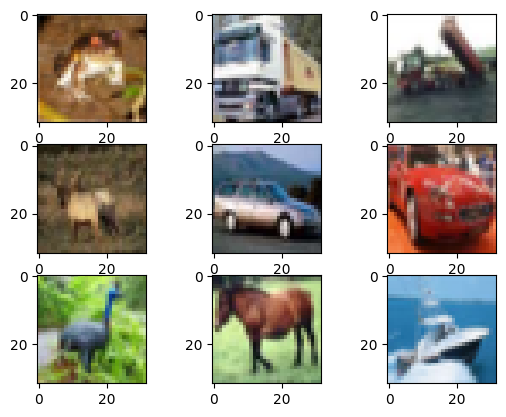

In [5]:
# Display some images from the dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [6]:
# Dataset shape and class distribution
print(f'Training data shape: {x_train.shape}')
print(f'Testing data shape: {x_test.shape}')
print(f'Class distribution in training set: {np.sum(y_train, axis=0)}')

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Class distribution in training set: [5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]


In [7]:
# Specify the model
model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Fit the Model
training = model.fit(x_train, y_train, validation_split=0.2, batch_size=64,epochs=50)

Epoch 1/50
625/625 [==============================] - 16s 11ms/step - loss: 1.7018 - accuracy: 0.3799 - val_loss: 1.3280 - val_accuracy: 0.5350
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 1.3847 - accuracy: 0.5032 - val_loss: 1.1643 - val_accuracy: 0.5920
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 1.2762 - accuracy: 0.5438 - val_loss: 1.1481 - val_accuracy: 0.5999
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 1.2044 - accuracy: 0.5722 - val_loss: 1.0653 - val_accuracy: 0.6394
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 1.1453 - accuracy: 0.5970 - val_loss: 1.0122 - val_accuracy: 0.6516
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 1.0975 - accuracy: 0.6123 - val_loss: 0.9705 - val_accuracy: 0.6696
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 1.0674 - accuracy: 0.6241 - val_loss: 0.9299 - val_accuracy: 0.6793
Epoc

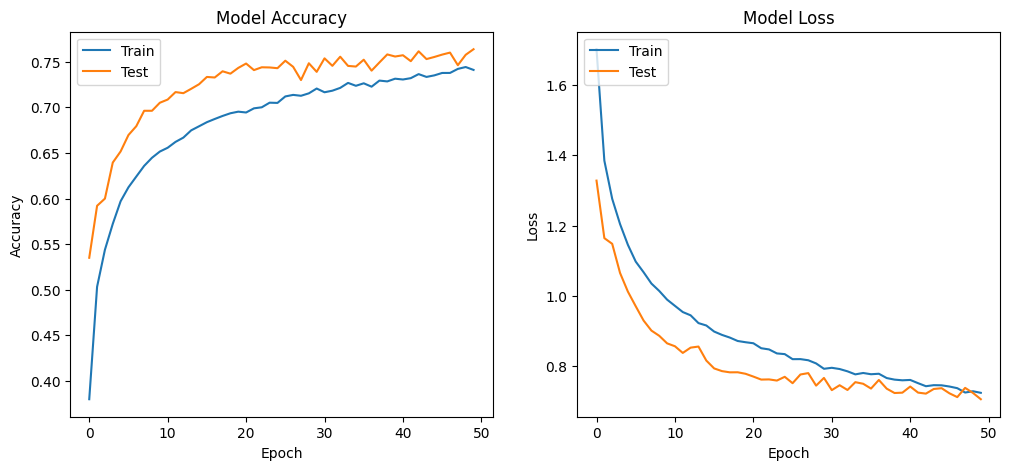

In [8]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [9]:
# Evaluate Model and convert to percentage
scores = model.evaluate(x_test, y_test)
print('Test accuracy: {:.2f}%'.format(scores[1]*100))


313/313 [==============================] - 1s 3ms/step - loss: 0.7032 - accuracy: 0.7618
Test accuracy: 76.18%


In [10]:
import numpy as np
prediction=model.predict(x_test)
predicted_labels= np.argmax(prediction, axis=1)

actual_label=np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [11]:
from sklearn import metrics

print(metrics.classification_report(actual_label,predicted_labels))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1000
           1       0.90      0.86      0.88      1000
           2       0.72      0.61      0.66      1000
           3       0.57      0.52      0.54      1000
           4       0.68      0.74      0.71      1000
           5       0.65      0.69      0.67      1000
           6       0.79      0.87      0.83      1000
           7       0.80      0.81      0.81      1000
           8       0.88      0.84      0.86      1000
           9       0.83      0.86      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



Text(0.5, 1.0, 'Confusion Matrix - CIFAR-10 Model')

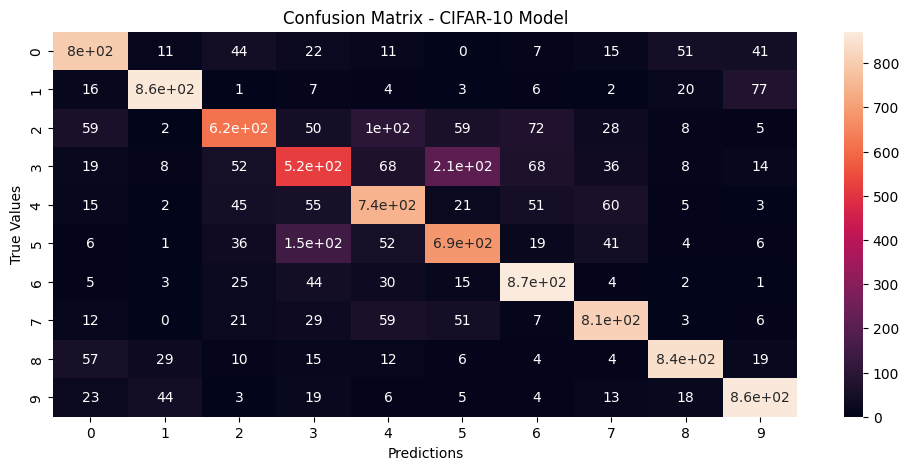

In [22]:
from functools import cmp_to_key
plt.figure(figsize=(12,5))
cm=metrics.confusion_matrix(actual_label,predicted_labels)
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.ylabel('True Values')
plt.xlabel('Predictions')
plt.title('Confusion Matrix - CIFAR-10 Model')

### Transfer Learning

In [13]:
# Importing the VGG16 Pretrained Model and Associated Utilities
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [14]:
# Resize CIFAR-10 image
x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

In [15]:
# Loading the VGG16 Model
VGG = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [16]:
# Initializing a Sequential model
VGG_model = Sequential()

# Integrating the VGG pretrained model into our architecture
VGG_model.add(VGG)

# Adding the pretrained convolutional blocks to the output layer
VGG_model.add(Flatten())
VGG_model.add(Dense(256, activation='relu'))
VGG_model.add(Dropout(0.1))
VGG_model.add(Dense(10, activation='softmax'))

# Unfreezing the first 15 convolutional block of the pretrained model for fine-tuning
for layer in VGG.layers[:15]:
    layer.trainable = False

# Compiling the model with a reduced learning rate for fine-tuning
VGG_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the Model
VGG_model.fit(x_train_resized, y_train, validation_split=0.2, batch_size=64, epochs=20)

Epoch 1/20
625/625 [==============================] - 31s 43ms/step - loss: 1.0208 - accuracy: 0.6385 - val_loss: 0.6616 - val_accuracy: 0.7732
Epoch 2/20
625/625 [==============================] - 27s 44ms/step - loss: 0.5944 - accuracy: 0.7985 - val_loss: 0.6040 - val_accuracy: 0.7957
Epoch 3/20
625/625 [==============================] - 27s 44ms/step - loss: 0.4656 - accuracy: 0.8396 - val_loss: 0.5899 - val_accuracy: 0.8057
Epoch 4/20
625/625 [==============================] - 26s 42ms/step - loss: 0.3697 - accuracy: 0.8725 - val_loss: 0.6299 - val_accuracy: 0.8000
Epoch 5/20
625/625 [==============================] - 25s 41ms/step - loss: 0.3019 - accuracy: 0.8964 - val_loss: 0.6154 - val_accuracy: 0.8103
Epoch 6/20
625/625 [==============================] - 25s 41ms/step - loss: 0.2258 - accuracy: 0.9213 - val_loss: 0.6059 - val_accuracy: 0.8169
Epoch 7/20
625/625 [==============================] - 26s 42ms/step - loss: 0.1867 - accuracy: 0.9362 - val_loss: 0.7286 - val_accuracy:

In [17]:
#Checking VGG  model summary
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 15241802 (58.14 MB)
Trainable params: 7606538 (29.02 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [18]:
# Assessing the Pretrained VGG Model
VGG_model.evaluate(x_test_resized, y_test)

313/313 [==============================] - 6s 16ms/step - loss: 1.3391 - accuracy: 0.8093


[1.3391045331954956, 0.8093000054359436]

In [19]:
# Obtaining Predictions using the Pretrained VGG Model on Resized Test Data
VGG_predictions = VGG_model.predict(x_test_resized)

# Preparing Labels for Confusion Matrix
VGG_predicted_labels = np.argmax(VGG_predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 5s 14ms/step


Text(0.5, 1.0, 'Confusion Matrix - VGG16 Model')

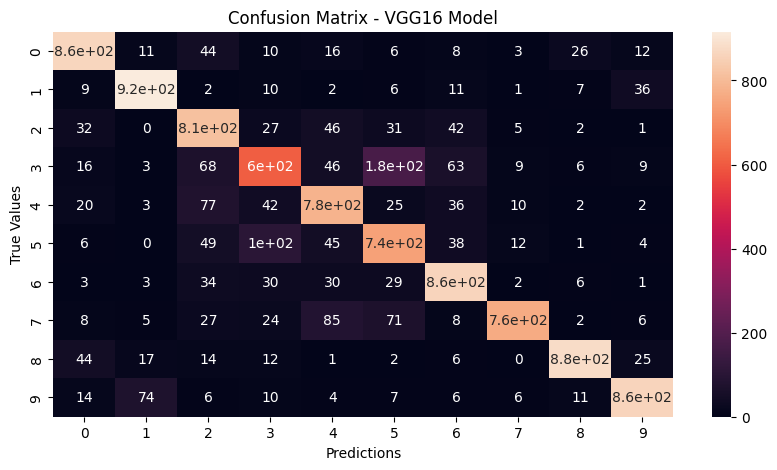

In [20]:
# Plotting the Confusion Matrix for VGG16 Predictions
plt.figure(figsize=(10, 5))
conf_matrix = metrics.confusion_matrix(actual_labels, VGG_predicted_labels)
sns.heatmap(conf_matrix, annot=True)
plt.ylabel('True Values')
plt.xlabel('Predictions')
plt.title('Confusion Matrix - VGG16 Model')